EXPLORATORY DATA ANALYSIS ON INDIAN LIVER PATIENTS

In [23]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [24]:
train = pd.read_csv('indian_liver_patient.csv')

In [ ]:
train.head

<bound method NDFrame.head of      Age  Gender  Total_Bilirubin  ...  Albumin  Albumin_and_Globulin_Ratio  Dataset
0     65  Female              0.7  ...      3.3                        0.90        1
1     62    Male             10.9  ...      3.2                        0.74        1
2     62    Male              7.3  ...      3.3                        0.89        1
3     58    Male              1.0  ...      3.4                        1.00        1
4     72    Male              3.9  ...      2.4                        0.40        1
..   ...     ...              ...  ...      ...                         ...      ...
578   60    Male              0.5  ...      1.6                        0.37        2
579   40    Male              0.6  ...      3.2                        1.10        1
580   52    Male              0.8  ...      3.2                        1.00        1
581   31    Male              1.3  ...      3.4                        1.00        1
582   38    Male              1.0  

In [ ]:
#checking for missing values
train.isnull()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
578,False,False,False,False,False,False,False,False,False,False,False
579,False,False,False,False,False,False,False,False,False,False,False
580,False,False,False,False,False,False,False,False,False,False,False
581,False,False,False,False,False,False,False,False,False,False,False


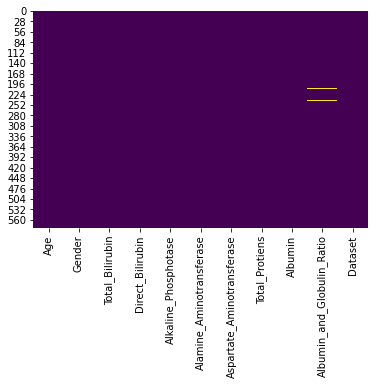

In [ ]:
sns.heatmap(train.isnull(),cbar = False,cmap='viridis')

In [ ]:
#missing entries are seen in Albumin_and_Globulin_Ratio feature

train.info() #to get the overiew of the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


we can see that, there are 4 missing values in the Albumin_and_Globulin_Ratio column.  Here, we are dropping those particular rows which have missing data. We could, in fact, fill those place with values of our own, using options like:

1.   A constant value that has meaning within the domain, such as 0, distinct from all other values.
2.  A value from another randomly selected record, or the immediately next or previous record.
2.   A mean, median or mode value for the column.
2.A value estimated by another predictive model.





But here, since a very small fraction of values are missing, we choose to drop those rows.

In [ ]:
train.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
#here we can see that Gender is in form of string, it has to converted to float values
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(['Male','Female'])
train.loc[:,'Gender'] = le.transform(train['Gender'])

In [ ]:
#train.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
#Remove rows with missing values
train = train.dropna(how = 'any', axis = 0)



In [ ]:
#Also transform Dataset variable into usual conventions followed
train['Dataset'] = train['Dataset'].map({2:0, 1:1})

In [ ]:
#train.info()
train.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,0
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,1,1.0,0.3,216,21,24,7.3,4.4,1.50,0


In [ ]:
#features characteristics to determine if feature scaling is necessary
train.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000
mean,44.782383,0.758204,3.315371,1.494128,291.366149,81.126079,110.414508,6.481693,3.138515,0.947064,0.715026
std,16.221786,0.428542,6.227716,2.816499,243.561863,183.182845,289.850034,1.084641,0.794435,0.319592,0.451792
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,1.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,1.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,1.000000,2.600000,1.300000,298.000000,61.000000,87.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


Here as you can notice mean value is less than median value of each column which is represented by 50%(50th percentile) in index column.

It clearly reflects from the above output that values across different variables are distributed far too extensively. We could perform feature scaling or normalization so as to improve the classifier accuracy.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train, train['Dataset'], random_state = 0)
scaler = MinMaxScaler()
#Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#Determining the healthy-affected split
print("Positive records:", train['Dataset'].value_counts().iloc[0])
print("Negative records:", train['Dataset'].value_counts().iloc[1])

Positive records: 414
Negative records: 165


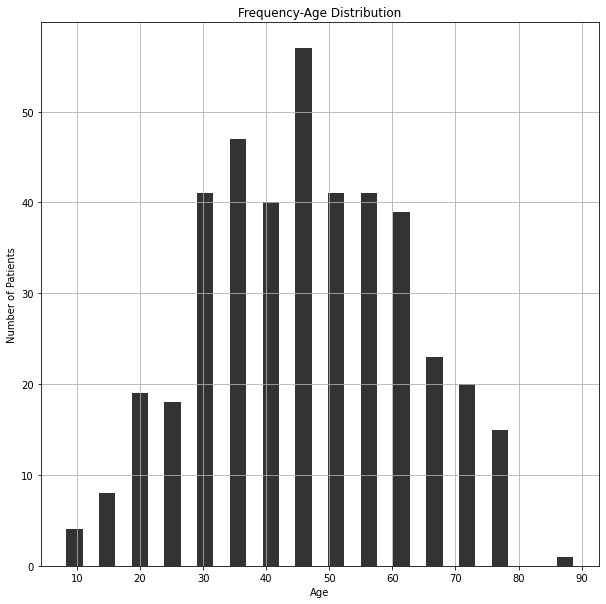

In [ ]:
#Determine statistics based on age
plt.figure(figsize=(10, 10))
plt.hist(train[train['Dataset'] == 1]['Age'], bins = 16, align = 'mid', rwidth = 0.5, color = 'black', alpha = 0.8)
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.title('Frequency-Age Distribution')
plt.grid(True)
plt.savefig('fig1')
plt.show()

Looking at the age vs. frequency graph, we can observe that middle-aged people are the worst affected. Even elderly people are also suffering from liver ailments, as seen by the bar sizes at ages 60-80.

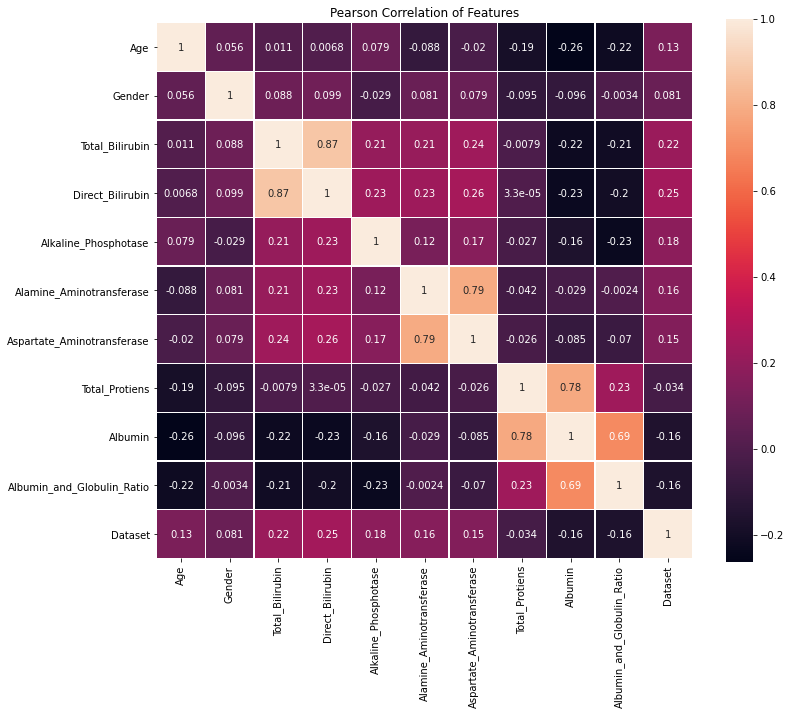

In [ ]:
#correlation-matrix
plt.subplots(figsize=(12, 10))
plt.title('Pearson Correlation of Features')
# Draw the heatmap using seaborn
sns.heatmap(data.corr(),linewidths=0.25, vmax=1.0, square=True,annot=True)
plt.savefig('fig2')
plt.sho

In [3]:
pip install dtale


     |████████████████████████████████| 7.7MB 4.3MB/s 
     |████████████████████████████████| 81kB 8.5MB/s 
     |████████████████████████████████| 74.6MB 92kB/s 
     |████████████████████████████████| 645kB 47.4MB/s 
     |████████████████████████████████| 1.8MB 38.3MB/s 
     |████████████████████████████████| 71kB 9.0MB/s 
     |████████████████████████████████| 194kB 46.4MB/s 
     |████████████████████████████████| 13.2MB 43.7MB/s 
     |████████████████████████████████| 51kB 6.2MB/s 
     |████████████████████████████████| 1.0MB 31.2MB/s 
     |████████████████████████████████| 3.5MB 42.7MB/s 
     |████████████████████████████████| 194kB 46.7MB/s 
     |████████████████████████████████| 1.8MB 39.2MB/s 
     |████████████████████████████████| 358kB 46.4MB/s 
  Created wheel for dash: filename=dash-1.18.1-cp36-none-any.whl size=83681 sha256=dc366e9e696a40cf072afe3457a20aa118fee4c1ad31692fe541e43fefa23255
  Stored in directory: /root/.cache/pip/wheels/eb/56/fb/79b2169ce9fcb79753e

In [25]:
import dtale
import dtale.app as dtale_app
dtale_app.USE_COLAB = True
dtale.show(train , ignore_duplicate=True)

https://mzhuq7r8ikg-496ff2e9c6d22116-40000-colab.googleusercontent.com/dtale/main/4

In [29]:
# DISCLAIMER: 'df' refers to the data you passed in when calling 'dtale.show'

import numpy as np
import pandas as pd

if isinstance(train, (pd.DatetimeIndex, pd.MultiIndex)):
	train = train.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
train = train.reset_index().drop('index', axis=1, errors='ignore')
train.columns = [str(c) for c in train.columns]  # update columns to strings in case they are numbers

chart = pd.value_counts(train[~pd.isnull(train['Age'])]['Age'])

In [30]:
chart

60    34
45    25
50    23
42    21
38    21
      ..
10     1
8      1
84     1
6      1
90     1
Name: Age, Length: 72, dtype: int64

In [31]:
# CORRELATION

import pandas as pd

if isinstance(train, (pd.DatetimeIndex, pd.MultiIndex)):
	train = train.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
train = train.reset_index().drop('index', axis=1, errors='ignore')
train.columns = [str(c) for c in train.columns]  # update columns to strings in case they are numbers

corr_data = train.corr(method='pearson')
corr_data.index.name = str('column')
corr_data = corr_data.reset_index()

In [32]:
corr_data

,column,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,-0.137351
1,Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,-0.220208
2,Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,-0.246046
3,Alkaline_Phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,-0.184866
4,Alamine_Aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,-0.163416
5,Aspartate_Aminotransferase,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,-0.151934
6,Total_Protiens,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,0.035008
7,Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,0.161388
8,Albumin_and_Globulin_Ratio,-0.216408,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,0.163131
9,Dataset,-0.137351,-0.220208,-0.246046,-0.184866,-0.163416,-0.151934,0.035008,0.161388,0.163131,1.000000


In [14]:
pip install sweetviz

     |████████████████████████████████| 15.1MB 293kB/s 
     |████████████████████████████████| 71kB 8.6MB/s 
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


EDA USING SWEETVIZ

In [15]:
import sweetviz as sv

my_report = sv.analyze(train)
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
